# レポート課題3

## 特異値分解

特異値分解（singular value decomposition）について調べて説明せよ．さらに，主成分分析と特異値分解との違いや関連性について説明せよ．

特異値分解とは任意の$m \times n$行列$A$に対して、$A = USV^{\mathrm{T}}$ と分解することである。

このとき、$U$は$m \times m$の直交行列で、$V$は$n \times n$の直交行列である。

$S$は$m \times n$の非対角成分は$0$、対角成分は非負で大きさの順に並んだ行列である。この対角成分のことを特異値という。

主成分分析が、元の特徴量の線形結合で表現される新しい軸を導くのに対し、特異値分解では、特異値が与えられたデータから算出された軸の重要度を表す。

元のデータを$X$とし、主成分分析 $\Sigma=V_{pca}LV_{pca}^{\mathrm{T}}$（$\Sigma$は共分散行列）と特異値分解 $X=USV_{svd}^{\mathrm{T}}$ はどちらも$XV$とすることで、元のデータを主成分のデータに変換できる。

また$1～k$列を用いた部分行列$V^{(k)}$を使い、$XV^{(k)}$とすることで、特徴量の次元を削減することができる。

## 主成分分析

任意のデータを選び，主成分分析を行った結果をまとめよ．ただし，以下の事柄は必ずレポートに含めるようにせよ．また，分析に用いたプログラムもJupyter Notebookにまとめよ．

+ 選んだデータの説明（提供者，内容，データのサイズなど）
+ 累積寄与率のグラフ
+ 第一主成分と第二主成分のベクトル
+ 主成分分析から分かったこと

今回使用したデータは、総務省の[統計局](http://www.stat.go.jp/index.html)統計情報利用推進課が発表している、「都道府県・市区町村のすがた（社会・人口統計体系）」の都道府県別基礎データ「B:自然環境」である。[このデータベース（e-Stat）](https://www.e-stat.go.jp/dbview?sid=0000010102)のうち、今回使用したのは2018年度のものである。

ダウンロードする際は
+ ダウンロード範囲：ページ上部の選択項目 (調査年)
+ ファイル形式：CSV形式(クロス集計表形式)
+ ヘッダの出力：出力しない
+ コードの出力：出力しない
+ ヘッダの出力、コードの出力について：データがない行を表示しない、データがない列を表示しない

を選択すると、以下のデータと同じデータ（8.22KB）をダウンロードできる。

社会・人口統計体系とは人口・世帯、自然環境、経済基盤、行政基盤、教育、労働、居住、健康・医療、福祉・社会保障など国民生活全般の実態を示す地域別統計データを収集・加工し、これを体系的に編成し整備したもの[1](http://www.stat.go.jp/data/ssds/index.html)である。自然環境のデータを詳しく調べることで、地形や気候などに応じた都道府県のクラスタを見つけることができると予想したため、このデータを選んだ。

$\rm Figure\ 1$は主成分の数と累積寄与率の関係を表すグラフで、主成分の数が4の場合ですでに累積寄与率が8割を超すことが分かる。

第一主成分と第二主成分のベクトルは、$\rm Figure\ 1$の直下のセルに出力した。

$\rm Figure\ 2$は主成分分析で特徴量を2次元に削減し、横軸に第1次元、縦軸に第2次元を設定した散布図である。試しに地域別に色分けしてみたが、北海道が明らかにほかの都府県とは異質であることが分かる。これはケッペンの気候区分において、北海道が冷帯湿潤気候、その他の大部分が温暖湿潤気候に分類されることから予想がつく。逆に沖縄県は他の都府県との明らかな違いが見られなかった。

しかしこの分類の仕方では、地域ごとに固まっているものもあれば他の地域と重なっているものもあるため、正確に都道府県ごとの自然環境を知るためにクラスタリングを行った。

その結果が$\rm Figure\ 4$～$\rm Figure\ 9$である。これらの図から、大きな自然環境グループとして、
+ 北海道
+ 東北地方
+ 北陸・山陰地方
+ 関東・東海・山陽地方
+ 近畿・四国・九州地方

と分類することができる。

$\rm Figure\ 7,Figure\ 9$では関東、九州、山陽地方で過度な分類がされてしまっていると感じた。このことから、関東・東海・山陽地方と近畿・四国・九州地方の自然環境は比較的似通っていることがわかる。

また、日本列島の太平洋側と日本海側できれいに自然環境が異なるということも再確認できた（$\rm Figure\ 10,Figure\ 11$）。

主成分分析によって、特徴量が減ったにもかかわらず、法則性が見られるほどデータの特徴を表せるのがすごいと思った。また2次元に削減することで、イメージで分かりやすくグループを見つけることができるというメリットもあると思った。

In [1]:
import pandas as pd

url = 'file:///C:/Users/yusuk/Downloads/FEH_00200502_210206225717.csv'
df = pd.read_csv(url, encoding="shift-jis")
df

,調査年,地域,/Ｂ 自然環境,B1101_ 総面積（北方地域及び竹島を除く）【ｈａ】,B1102_ 総面積（北方地域及び竹島を含む）【ｈａ】,B1103_ 可住地面積【ｈａ】,B1104_ 主要湖沼面積【ｈａ】,B1108_ 自然環境保全地域面積【ｈａ】,B2101_ 自然公園面積【ｈａ】,B2102_ 都道府県立自然公園数【箇所】,...,B2105_ 国定公園面積【ｈａ】,B4101_ 年平均気温【℃】,B4102_ 最高気温（日最高気温の月平均の最高値）【℃】,B4103_ 最低気温（日最低気温の月平均の最低値）【℃】,B4104_ 快晴日数（年間）【日】,B4106_ 降水日数（年間）【日】,B4107_ 雪日数（年間）【日】,B4108_ 日照時間（年間）【時間】,B4109_ 降水量（年間）【ｍｍ】,B4111_ 年平均相対湿度【％】
0,2018年度,全国,NaN,37297091,37797417,12263436,231378,105586.78,5577607,311,...,1409728,-,-,-,-,-,-,-,-,-
1,2018年度,北海道,NaN,7842077,8342383,2237238,68441,9561.83,868472,12,...,212359,9.5,25.7,-7.6,10,157,131,1741.6,1282.0,69
2,2018年度,青森県,NaN,964565,964565,322971,13403,1230.17,114187,7,...,44607,11.0,27.4,-5.1,8,172,117,1642.0,1553.0,75
3,2018年度,岩手県,NaN,1527501,1527501,371401,0,4956.45,72061,7,...,20038,11.0,29.4,-6.9,8,120,106,1778.1,1322.0,76
4,2018年度,宮城県,NaN,728223,728223,315489,1931,8574.17,171201,8,...,50273,13.6,29.7,-2.2,20,106,63,1998.4,1082.0,72
5,2018年度,秋田県,NaN,1163752,1163752,320437,7901,823.59,123801,8,...,46765,12.3,29.2,-4.0,9,168,101,1526.2,2016.5,75
6,2018年度,山形県,NaN,932315,932315,288480,0,5105.96,155510,6,...,42255,12.6,32.8,-4.7,8,137,89,1765.0,1124.0,75
7,2018年度,福島県,NaN,1378390,1378390,421711,12917,4867.41,179081,11,...,33665,14.2,33.4,-2.4,14,101,73,1915.7,828.0,70
8,2018年度,茨城県,NaN,609733,609733,397535,22169,645.21,90896,9,...,31801,15.3,31.9,-2.4,44,106,10,2199.1,1282.5,72
9,2018年度,栃木県,NaN,640809,640809,298276,1190,5281.61,133443,8,...,0,15.2,32.8,-2.8,28,101,17,2156.3,1257.0,71


In [2]:
!pip install japanize-matplotlib

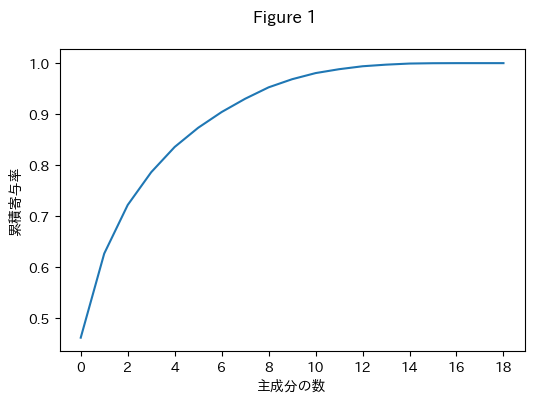

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn import preprocessing
from sklearn.decomposition import PCA

ss = preprocessing.StandardScaler()

data = df.iloc[[i for i in range(1, df.shape[0])], [j for j in range(3, df.shape[1])]].to_numpy()
data = ss.fit_transform(data)
pca = PCA()
pca.fit(data)

fig, ax = plt.subplots(dpi=100)
fig.suptitle('Figure 1')
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(mpl.ticker.IndexLocator(2, 0))
ax.set_xlabel('主成分の数')
ax.set_ylabel('累積寄与率')
fig.show()

In [4]:
pca = PCA(n_components=2).fit(data)

print('第1主成分'); print(pca.components_[0])
print()
print('第2主成分'); print(pca.components_[1])

第1主成分
[ 0.3086957   0.30766241  0.30361808  0.22485661  0.15695004  0.30174065
  0.11338254  0.1876089   0.27972683  0.26454845 -0.26066679 -0.25277752
 -0.21290883 -0.1710912   0.15922382  0.27064658 -0.19237367 -0.08718875
  0.07538331]

第2主成分
[ 0.15872042  0.16116097  0.18378391  0.07576551  0.15686761  0.18343674
  0.07998338  0.17081607  0.17537832  0.0926631   0.13601007  0.12000262
  0.05727494  0.31776189 -0.40685245 -0.26862679  0.42599835 -0.20193208
 -0.4231421 ]


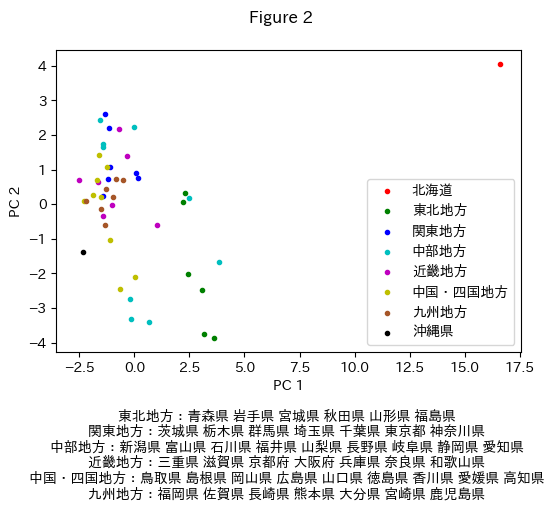

In [5]:
regions = ['北海道', '東北地方', '関東地方', '中部地方', '近畿地方', '中国・四国地方', '九州地方', '沖縄県']
prefs = []
for i in range(1, 48):
    prefs.append(df['地域'][i])

def printPrefs(n, m):
    res = ''
    for i in range(n, m):
        res += prefs[i] + ' '
    return res

pca = PCA(2)
P = pca.fit_transform(data)

fig, ax = plt.subplots(dpi=100)
fig.suptitle('Figure 2')
ax.set_xlabel('PC 1\n\n' +
              '東北地方：' + printPrefs(1, 7) + '\n' +
              '関東地方：' + printPrefs(7, 14) + '\n' +
              '中部地方：' + printPrefs(14, 23) + '\n' +
              '近畿地方：' + printPrefs(23, 30) + '\n' +
              '中国・四国地方：' + printPrefs(30, 39) + '\n' +
              '九州地方：' + printPrefs(39, 46))
ax.set_ylabel('PC 2')
ax.scatter(P[0, 0], P[0, 1], marker=".", c="r")                # 北海道
ax.scatter(P[1:7, 0], P[1:7, 1], marker=".", c="g")            # 東北地方
ax.scatter(P[7:14, 0], P[7:14, 1], marker=".", c="b")          # 関東地方
ax.scatter(P[14:23, 0], P[14:23, 1], marker=".", c="c")        # 中部地方
ax.scatter(P[23:30, 0], P[23:30, 1], marker=".", c="m")        # 近畿地方
ax.scatter(P[30:39, 0], P[30:39, 1], marker=".", c="y")        # 中国・四国地方
ax.scatter(P[39:46, 0], P[39:46, 1], marker=".", c="#a65628")  # 九州地方
ax.scatter(P[46, 0], P[46, 1], marker=".", c="k")              # 沖縄県
ax.legend(labels=regions)
fig.show()

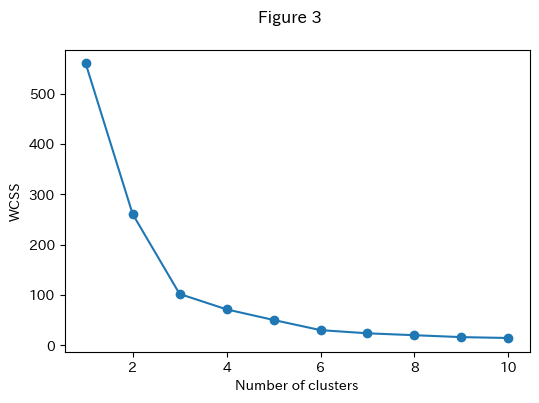

In [6]:
from sklearn.cluster import KMeans

distortions = []

for i  in range(1,11): 
    km = KMeans(n_clusters=i,)
    km.fit(P)
    distortions.append(km.inertia_)

fig, ax = plt.subplots(dpi=100)
fig.suptitle('Figure 3')
ax.plot(range(1,11), distortions,marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

In [7]:
!pip install japanmap

In [8]:
from japanmap import pref_names, pref_code, picture

colors = ['green', 'blue','orangered', 'skyblue', 'darkviolet', 'gold', 'lime', 'pink']

def createModel(n):
    model = KMeans(n_clusters=n)
    result = model.fit(P)
    return result

def printPrefs2(label):
    res = ''
    for n in range(max(label) + 1):
        strs = f'\ncluster{n+1}: '
        for i in range(47):
            if n == label[i]:
                strs += prefs[i] + ' '
        res += strs
    return res

def dictPrefs(label):
    res = dict()
    for i in range(47):
        res[prefs[i]] = colors[label[i]]
    return res

def printModel(n, result, figuNum):
    fig = plt.figure(dpi=100)
    fig.suptitle(f'Figure {figuNum}')
    ax = fig.add_subplot()
    # ax.set_xlabel('PC 1\n' + printPrefs2(result.labels_))
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    for i in range(n):
        ax.scatter(P[result.labels_==i, 0], P[result.labels_==i, 1],
                   c=colors[i], marker=".", label=f'cluster{i+1}')
    ax.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1],
               s=20, marker="x", c=colors[0:n])
    ax.legend()
    plt.show()

    fig, ax = plt.subplots(dpi=100)
    fig.suptitle(f'Figure {figuNum + 1}')
    plt.imshow(picture(dictPrefs(result.labels_)))

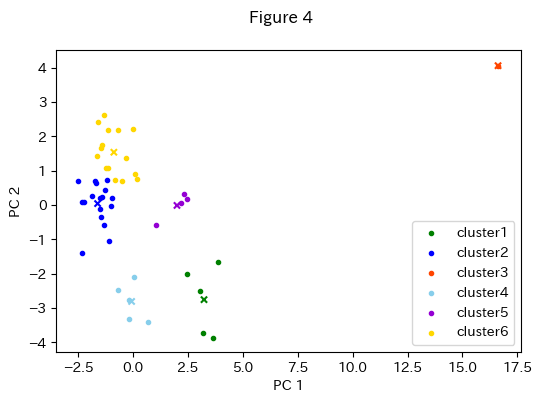

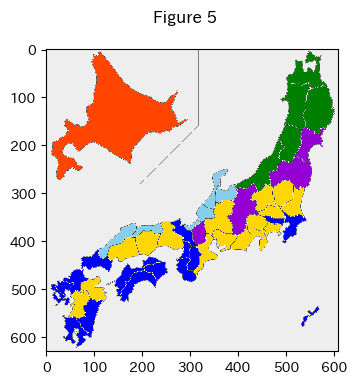

In [40]:
result = createModel(6)
printModel(6, result, 4)

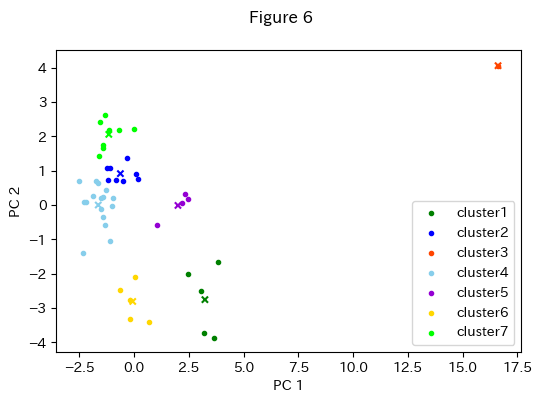

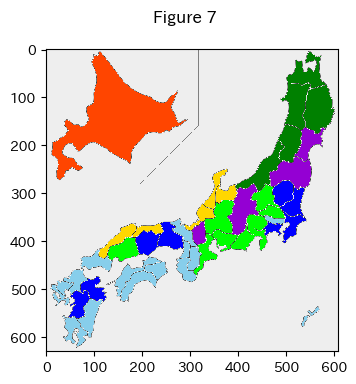

In [55]:
result = createModel(7)
printModel(7, result, 6)

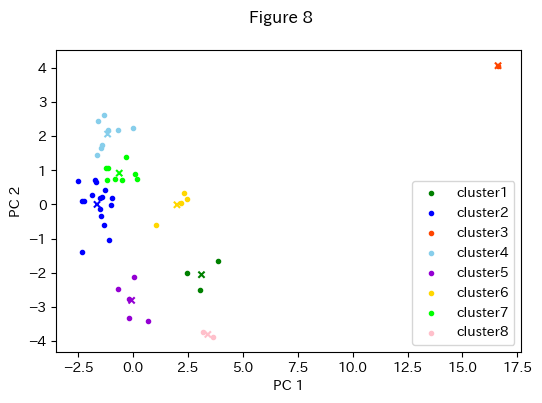

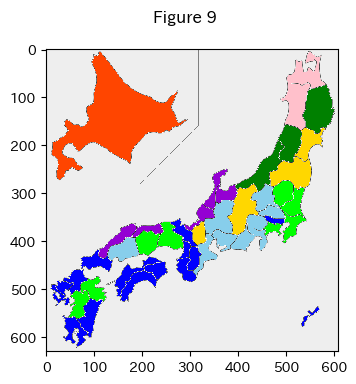

In [60]:
result = createModel(8)
printModel(8, result, 8)

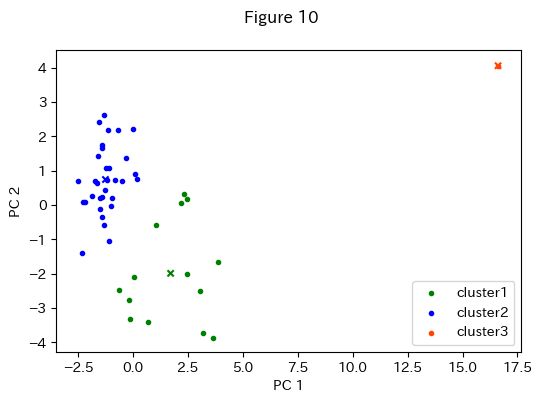

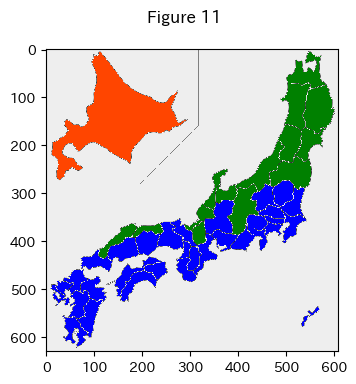

In [65]:
result = createModel(3)
printModel(3, result, 10)